In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2, EfficientNetB0
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=10
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train = train_datagen.flow_from_directory(r"C:\Users\vivek\Downloads\archive (10)\chest_xray\train", target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')
val = val_test_datagen.flow_from_directory(r"C:\Users\vivek\Downloads\archive (10)\chest_xray\val", target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')
test = val_test_datagen.flow_from_directory(r"C:\Users\vivek\Downloads\archive (10)\chest_xray\test", target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary', shuffle=False)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
def build_model(base_model, freeze_layers=True):
    if freeze_layers:
        base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
models = {
    'VGG16': VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'ResNet50': ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'MobileNetV2': MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'EfficientNetB0': EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
}

histories = {}

for name, base in models.items():
    print(f"\nTraining {name}...")
    model = build_model(base)
    history = model.fit(train, validation_data=val, epochs=5)
    histories[name] = history


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Training VGG16...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 2207s 13s/step - accuracy: 0.5951 - loss: 0.7017 - val_accuracy: 0.5000 - val_loss: 0.7852
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 134s 819ms/step - accuracy: 0.7600 - loss: 0.4955 - val_accuracy: 0.5000 - val_loss: 0.7073
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 135s 828ms/step - accuracy: 0.7959 - loss: 0.4160 - val_accuracy: 0.5625 - val_loss: 0.6168
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 133s 818ms/step - accuracy: 0.8407 - loss: 0.3669 - val_accuracy: 0.5625 - val_loss: 0.6492
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 133s 814ms/step - accuracy: 0.8617 - loss: 0.3224 - val_accuracy: 0.6875 - val_loss: 0.6066

Training ResNet50...
Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 149s 825ms/step - accuracy: 0.7092 - loss: 0.6025 - val_accuracy: 0.5000 - val_loss: 0.8038
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 127s 782ms/step - accuracy: 0.7546 - loss: 0.5507 - val_accuracy: 0.5000 - val_loss: 0.7876
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 128s 785ms/step - accur

In [ ]:
for name, base in models.items():
    print(f"Evaluating {name}")
    model = build_model(base, freeze_layers=False)
    model.fit(train, validation_data=val, epochs=5)
    loss, acc = model.evaluate(test)
    print(f"{name} Test Accuracy: {acc:.4f}")


Evaluating VGG16
Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 136s 818ms/step - accuracy: 0.5973 - loss: 0.6953 - val_accuracy: 0.5000 - val_loss: 0.7854
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 131s 802ms/step - accuracy: 0.7512 - loss: 0.5245 - val_accuracy: 0.5000 - val_loss: 0.7225
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 131s 802ms/step - accuracy: 0.7866 - loss: 0.4400 - val_accuracy: 0.5625 - val_loss: 0.6849
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 145s 823ms/step - accuracy: 0.8136 - loss: 0.3847 - val_accuracy: 0.5625 - val_loss: 0.6248
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 137s 839ms/step - accuracy: 0.8580 - loss: 0.3358 - val_accuracy: 0.6250 - val_loss: 0.6343
20/20 ━━━━━━━━━━━━━━━━━━━━ 221s 12s/step - accuracy: 0.6431 - loss: 0.6415
VGG16 Test Accuracy: 0.7853
Evaluating ResNet50
Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 786ms/step - accuracy: 0.5759 - loss: 0.8334 - val_accuracy: 0.5000 - val_loss: 0.8536
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 123s 754ms/step - accuracy: 0.7206 

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories, metric='accuracy'):
    plt.figure(figsize=(12, 6))
    for name, history in histories.items():
        plt.plot(history.history[metric], label=f'{name} Train')
        plt.plot(history.history[f'val_{metric}'], linestyle='--', label=f'{name} Val')
    plt.title(f'Model {metric.capitalize()} Comparison')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()


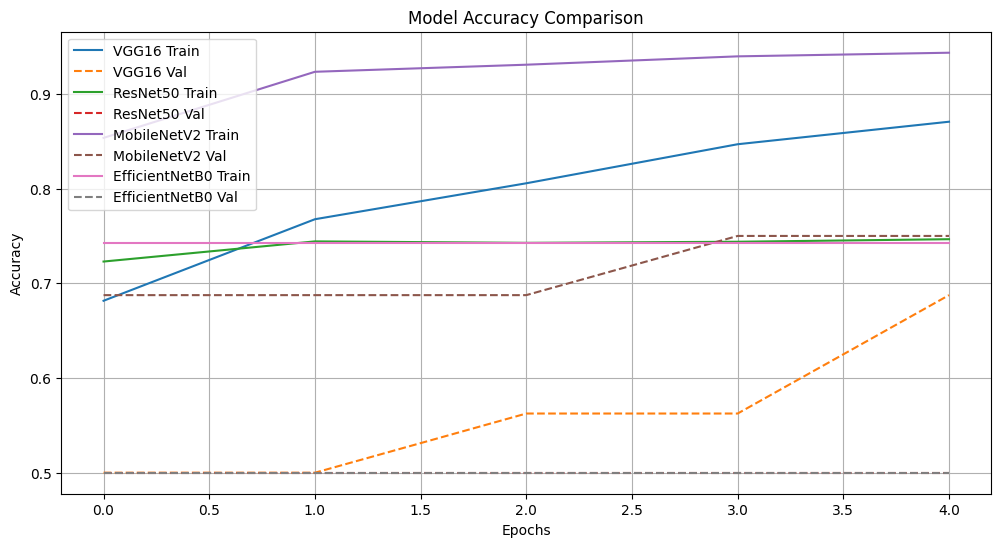

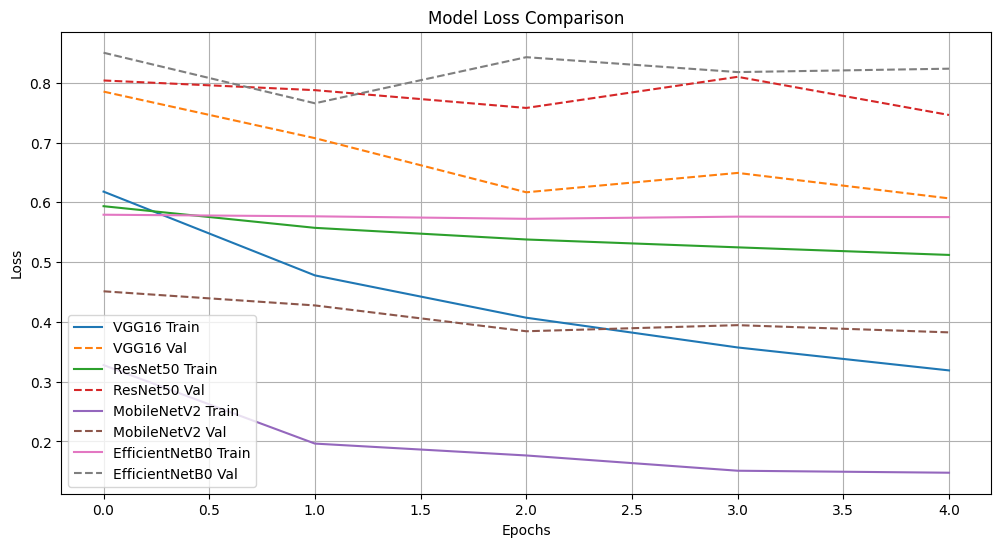

In [ ]:
plot_history(histories, metric='accuracy')  # for accuracy
plot_history(histories, metric='loss')      # for loss


In [ ]:
import os

def count_images(folder):
    normal = len(os.listdir(os.path.join(folder, 'NORMAL')))
    pneumonia = len(os.listdir(os.path.join(folder, 'PNEUMONIA')))
    print(f"NORMAL: {normal}, PNEUMONIA: {pneumonia}")

count_images('/content/drive/MyDrive/chest_xray/val')


NORMAL: 8, PNEUMONIA: 8
